In [1]:
from mathdyn.equations import *
from datatypes.loader import get_params
from phaseportrait import PhasePortrait3D, PhasePortrait2D
import matplotlib.pyplot as plt

params, initial, interval = get_params("params.yaml", "eq6")
t_val = np.arange(interval.t0, interval.th, interval.h)

H_eq, C_eq, B_eq = equilibrium(params.point, params.r_H, params.r_C, params.r_B, params.alpha, params.beta, params.gamma, params.m_1, params.m_2, params.g, params.k, params.k_B, params.b_0, B_star=initial.B_nol)
eigenvalues, re, im = find_jacobian(H_eq, C_eq, B_eq, params.r_H, params.r_C, params.r_B, params.alpha, params.beta, params.gamma, params.m_1, params.m_2, params.g, params.k, params.k_B, params.b_0)
phi_val = np.real(find_phi(eigenvalues, interval.h))
print("equilibrium point:", f"({H_eq}, {C_eq}, {B_eq})")


equilibrium point: (0, 0.05903135693100664, 0.1)


 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 = -0.4459768465421D+13   r2 = -0.2225586023833D+04
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 = -0.1281023894008D+18   r2 = -0.6392773294862D+08
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 = -0.1281023894008D+18   r2 = -0.6392773294862D+08
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 = -0.1281023894008D+18   r2 = -0.6392773294862D+08
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      

/home/adminsvr/miniconda3/envs/alyssa/lib/python3.10/site-packages/phaseportrait/streamlines/streamlines_base.py:84: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  return integrate.odeint(self._speed, coords, sign * np.arange(1,5)*0.2*deltat)[-1]


 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 = -0.3243098465842D+15   r2 = -0.1618423618952D+06
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 = -0.3243098465842D+15   r2 = -0.1618423618952D+06
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.5124095576030D+18   r2 =  0.2442302329345D+09
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 = -0.2918703023673D+10   r2 = -0.2717914419708D+01
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      

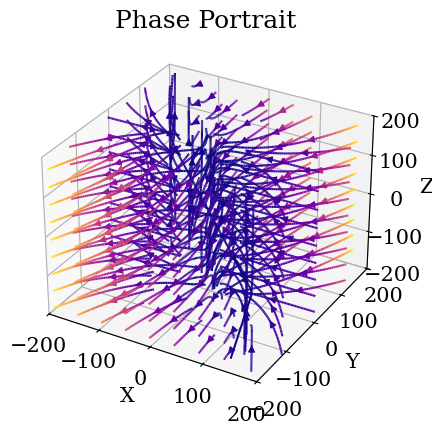

In [2]:
def dF(H_n, C_n, B_n, phi = phi_val, r_H=params.r_H, r_C=params.r_C, r_B=params.r_B, alpha=params.alpha, beta=params.beta, gamma=params.gamma, m_1=params.m_1, m_2=params.m_2, g=params.g, K=params.k, K_B=params.k_B, B_0=params.b_0):
    # sigmoid = (1/(1+math.exp(-g*(B_n - B_0))))
    sigmoid = 1 / (1 + math.exp(-np.clip(g*(B_n - B_0), -50, 50)))
    dH = r_H*H_n*(1-(H_n + C_n)/K) - beta*H_n*C_n - m_1*H_n*sigmoid
    dC = r_C*C_n*(1-(H_n + C_n)/K) + beta*H_n*C_n - alpha*C_n + m_2*C_n*sigmoid
    dB = r_B*B_n*(1-(B_n/K_B)) + gamma*C_n*B_n
    return dH, dC, dB


phaseportrait = PhasePortrait3D(dF, [-200,200], MeshDim=10, maxLen=10000, deltat=0.001)
phaseportrait.plot(color='plasma', grid=True)
plt.savefig('phaseportrait.jpg')
plt.show()

/home/adminsvr/miniconda3/envs/alyssa/lib/python3.10/site-packages/phaseportrait/streamlines/streamlines_base.py:84: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  return integrate.odeint(self._speed, coords, sign * np.arange(1,5)*0.2*deltat)[-1]


 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.1367346173041D+27   r2 =  0.1173649210535D+18
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.7585009703262D+14   r2 =  0.7058930597069D+05
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.7585009703262D+14   r2 =  0.7058930597069D+05
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.7585009703262D+14   r2 =  0.7058930597069D+05
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      

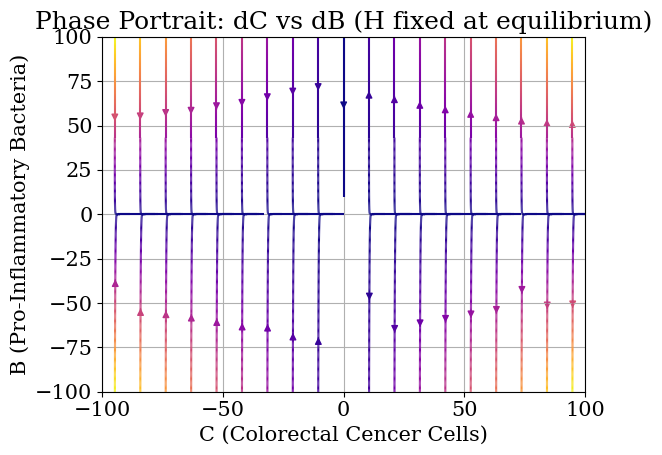

In [54]:
# 2D reduction of dF: only H and B, fix C = C_eq
def dF2D(C_n, B_n, H_n=initial.H_nol, phi = phi_val, r_H=params.r_H, r_C=params.r_C, r_B=params.r_B, alpha=params.alpha, beta=params.beta, gamma=params.gamma, m_1=params.m_1, m_2=params.m_2, g=params.g, K=params.k, K_B=params.k_B, B_0=params.b_0):
    # sigmoid = (1/(1+math.exp(-g*(B_n - B_0))))
    sigmoid = 1 / (1 + math.exp(-np.clip(g*(B_n - B_0), -50, 50)))
    dC = r_C*C_n*(1-(H_n + C_n)/K) + beta*H_n*C_n - alpha*C_n + m_2*C_n*sigmoid
    dB = r_B*B_n*(1-(B_n/K_B)) + gamma*C_n*B_n
    return dC, dB

phaseportrait2D = PhasePortrait2D(dF2D, [-100, 100], Density=2, MeshDim=20, maxlen=25000, deltat=0.1)
phaseportrait2D.plot(color='plasma', grid=True)

plt.xlabel("C (Colorectal Cencer Cells)")
plt.ylabel("B (Pro-Inflammatory Bacteria)")
plt.title("Phase Portrait: dC vs dB (H fixed at equilibrium)")
plt.tight_layout()
plt.show()

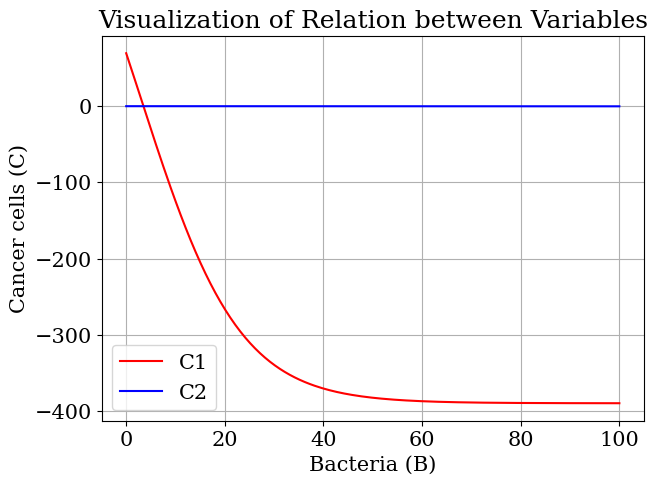

In [93]:
import numpy as np
import matplotlib.pyplot as plt

def F(N, C, k=params.k): return 1-(N+C)/k

def G(B, kB=params.k_B): return 1 - B/kB

def I(B, b0=params.b_0, g=params.g): return 1/(1+np.exp(-g*(B-b0)))

N = np.linspace(0, 100, 200)
B = np.linspace(0, 100, 200)
N_grid, B_grid = np.meshgrid(N, B)

C1 = (params.r_H * F(N, 0) - params.m_1 * I(B))/params.beta
C2 = (params.r_B * G(B))/params.gamma


plt.figure(figsize=(7,5))
plt.plot(B, C1, label='C1', color="Red")
plt.plot(B, C2, label='C2', color="blue")
plt.xlabel('Bacteria (B)')
plt.ylabel('Cancer cells (C)')
plt.legend()
plt.title('Visualization of Relation between Variables')
plt.grid(True)
plt.show()